In [5]:
import os
import shutil
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision import models
from sklearn.cluster import KMeans
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm
from PIL import ImageFile


ImageFile.LOAD_TRUNCATED_IMAGES = True

# 设置图片预处理步骤
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def jpg_mean(path, n_clusters=10):
    # 加载图片
    dataset = ImageFolder(path, transform=transform)
    dataloader = DataLoader(dataset, batch_size=64, shuffle=False)

    # 使用预训练的 ResNet50 模型
    model = models.resnet50(pretrained=True)
    # model = model.to('cuda')
    model.eval()

    # 提取图片特征
    features = []
    for inputs, _ in tqdm(dataloader):
        # inputs = inputs.to('cuda')
        with torch.no_grad():
            outputs = model(inputs)
        features.append(outputs.cpu().numpy())

    features = np.concatenate(features)

    # 使用 K-means 进行聚类
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features)

    # 打印聚类结果
    # print(kmeans.labels_)

    # 提取图片路径
    image_paths = [item[0] for item in dataset.samples]

    # 创建新的文件夹
    for label in set(kmeans.labels_):
        os.makedirs(f'{path}\\cluster_{label}', exist_ok=True)
    #     print(f'{path}\\cluster_{label}')

    # 将图片移到新的文件夹
    for image_path, label in zip(image_paths, kmeans.labels_):
        shutil.move(image_path,f'{path}\\cluster_{label}/{os.path.basename(image_path)}')


jpg_mean(r'Y:\Photo\iphone_photo(1-14)_re', 20)
# path_list = [r'Z:\Photo\Saved Pictures_re\长图', ]
# for path in path_list:
#     jpg_mean(path)

d:\ProgramData\mambaforge\envs\toolenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\ProgramData\mambaforge\envs\toolenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
 24%|██▍       | 19/79 [01:00<03:17,  3.29s/it]d:\ProgramData\mambaforge\envs\toolenv\lib\site-packages\PIL\Image.py:3368: DecompressionBombWarning: Image size (121848000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
100%|██████████| 79/79 [04:14<00:00,  3.22s/it]


In [1]:
import sys
import os

# 确定项目根目录（假设当前工作目录是项目的根目录）
project_root = os.path.abspath("..")
sys.path.insert(0, project_root)

from tools.FileOperations import compress_folder

compress_folder(r'Q:\Project\Celestial-Chess\ai\train_data')

100%|██████████| 4/4 [00:00<00:00,  8.44it/s]


[]

In [3]:

import sys
import os

# 确定项目根目录（假设当前工作目录是项目的根目录）
project_root = os.path.abspath("..")
sys.path.insert(0, project_root)

from tools.FileOperations import detect_identical_files, duplicate_files_report, move_identical_files, print_directory_structure
# Example usage:
directory_path = r'Q:\Project\CelestialVault'
# identical_files = detect_identical_files(directory_path)
# print(duplicate_files_report(identical_files))
print_directory_structure(directory_path, exclude_dirs=['.git', '__pycache__', '.pytest_cache'])


📄 .gitignore       	(188 bytes)
📁 constants/
    🐍 constant.py       	(39636 bytes)
    🐍 regex_patterns.py 	(2207 bytes)
    🐍 suffers.py        	(1166 bytes)
    🐍 __init__.py       	(131 bytes)
📁 docs/
    📝 usage.md 	(0 bytes)
📁 instances/
    🐍 inst_fetch.py      	(3094 bytes)
    🐍 inst_findiff.py    	(6068 bytes)
    🐍 inst_imgEncoder.py 	(7834 bytes)
    🐍 inst_network.py    	(9307 bytes)
    🐍 inst_queue.py      	(2911 bytes)
    🐍 inst_save.py       	(4352 bytes)
    🐍 inst_sub.py        	(3232 bytes)
    🐍 my_thread.py       	(16262 bytes)
    🐍 __init__.py        	(425 bytes)
📁 logs/
    📄 thread_manager(2024-05-16).log 	(26165 bytes)
    📄 thread_manager(2024-06-07).log 	(0 bytes)
    📄 thread_manager(2024-06-13).log 	(63 bytes)
    📄 thread_manager(2024-06-14).log 	(3001 bytes)
📄 pytest.ini       	(209 bytes)
📝 README.md        	(3456 bytes)
🗒️ requirements.txt 	(222 bytes)
🐍 setup.py         	(333 bytes)
📁 tests/
    🐍 conftest.py            	(768 bytes)
    🐍 test_FileO

In [4]:
move_identical_files(identical_files, directory_path + '\\duplicate')

Moved: Q:\Project\test\0.jpg -> Q:\Project\test\duplicate\cde27280cedbe9c35933844f68a175f1713404397b0d3b170445eaeca60eb037\0.jpg
Error moving Q:\Project\test\test_jpg\0.jpg to Q:\Project\test\duplicate\cde27280cedbe9c35933844f68a175f1713404397b0d3b170445eaeca60eb037\0.jpg: [WinError 183] Cannot create a file when that file already exists: 'Q:\\Project\\test\\test_jpg\\0.jpg' -> 'Q:\\Project\\test\\duplicate\\cde27280cedbe9c35933844f68a175f1713404397b0d3b170445eaeca60eb037\\0.jpg'
Moved: Q:\Project\test\text_img(rgba) - Copy.png -> Q:\Project\test\duplicate\547420e15b18362bf10ad95922351bf9e23ceb00da9818edc8466f6d040782e9\text_img(rgba) - Copy.png
Moved: Q:\Project\test\text_img(rgba).png -> Q:\Project\test\duplicate\547420e15b18362bf10ad95922351bf9e23ceb00da9818edc8466f6d040782e9\text_img(rgba).png
Moved: Q:\Project\test\text_img(rgba).txt -> Q:\Project\test\duplicate\7f83b1657ff1fc53b92dc18148a1d65dfc2d4b1fa3d677284addd200126d9069\text_img(rgba).txt
Moved: Q:\Project\test\text_img.txt 

[(WindowsPath('Q:/Project/test/0.jpg'),
  WindowsPath('Q:/Project/test/duplicate/cde27280cedbe9c35933844f68a175f1713404397b0d3b170445eaeca60eb037/0.jpg')),
 (WindowsPath('Q:/Project/test/text_img(rgba) - Copy.png'),
  WindowsPath('Q:/Project/test/duplicate/547420e15b18362bf10ad95922351bf9e23ceb00da9818edc8466f6d040782e9/text_img(rgba) - Copy.png')),
 (WindowsPath('Q:/Project/test/text_img(rgba).png'),
  WindowsPath('Q:/Project/test/duplicate/547420e15b18362bf10ad95922351bf9e23ceb00da9818edc8466f6d040782e9/text_img(rgba).png')),
 (WindowsPath('Q:/Project/test/text_img(rgba).txt'),
  WindowsPath('Q:/Project/test/duplicate/7f83b1657ff1fc53b92dc18148a1d65dfc2d4b1fa3d677284addd200126d9069/text_img(rgba).txt')),
 (WindowsPath('Q:/Project/test/text_img.txt'),
  WindowsPath('Q:/Project/test/duplicate/7f83b1657ff1fc53b92dc18148a1d65dfc2d4b1fa3d677284addd200126d9069/text_img.txt'))]

In [5]:
keys_to_select = [("735c2257fa1cfef50f3840fa91fd9602237a1a147fb70848587e68f849f4ad39", 16681 )]

new_dict = {key: identical_files[key] for key in keys_to_select if key in identical_files}
new_dict

{('735c2257fa1cfef50f3840fa91fd9602237a1a147fb70848587e68f849f4ad39',
  16681): [WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.001/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.002/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.003/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.004/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.005/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.006/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.007/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.008/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.009/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.010/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.011/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.012/网盘资源分享页.html'), WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/VOL/轻兰映画 VOL.001/网盘资源分享页.html'), WindowsPa

In [6]:
from tools.FileOperations import delete_identical_files

delete_list = delete_identical_files(new_dict)

Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.001\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.002\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.003\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.004\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.005\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.006\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.007\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.008\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.009\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.010\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.011\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\SPL\轻兰映画 SPL.012\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\VOL\轻兰映画 VOL.001\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\VOL\轻兰映画 VOL.002\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\VOL\轻兰映画 VOL.003\网盘资源分享页.html
Deleted: Y:\Photo\文件夹\人物_re\轻兰映画\VOL\轻兰映画 VOL.004\网盘资源分

[WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.001/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.002/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.003/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.004/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.005/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.006/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.007/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.008/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.009/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.010/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.011/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/SPL/轻兰映画 SPL.012/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/VOL/轻兰映画 VOL.001/网盘资源分享页.html'),
 WindowsPath('Y:/Photo/文件夹/人物_re/轻兰映画/VOL/轻兰映画 VOL.002/网盘资源分享页.html'),
 Windo

In [2]:
import timeit
from tools.FileOperations import detect_identical_files_v1, detect_identical_files_v2


directory_path = r'Q:\Project\test'

# Measure time for the first method
time_v1 = timeit.timeit(lambda: detect_identical_files_v1(directory_path), number=10)
print(f"Time for method v1: {time_v1:.4f} seconds")

# Measure time for the second method
time_v2 = timeit.timeit(lambda: detect_identical_files_v2(directory_path), number=10)
print(f"Time for method v2: {time_v2:.4f} seconds")

Time for method v1: 0.1008 seconds
Time for method v2: 0.0472 seconds


In [10]:
import sys
import os

# 确定项目根目录（假设当前工作目录是项目的根目录）
project_root = os.path.abspath("..")
sys.path.insert(0, project_root)

from instances.inst_sub import Suber

s = Suber()
s.clear_books(r'Q:\Project\test\text')

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


defaultdict(list, {})

Encoding text(rgba):: 100%|██████████| 535034/535034 [00:01<00:00, 471870.29it/s]


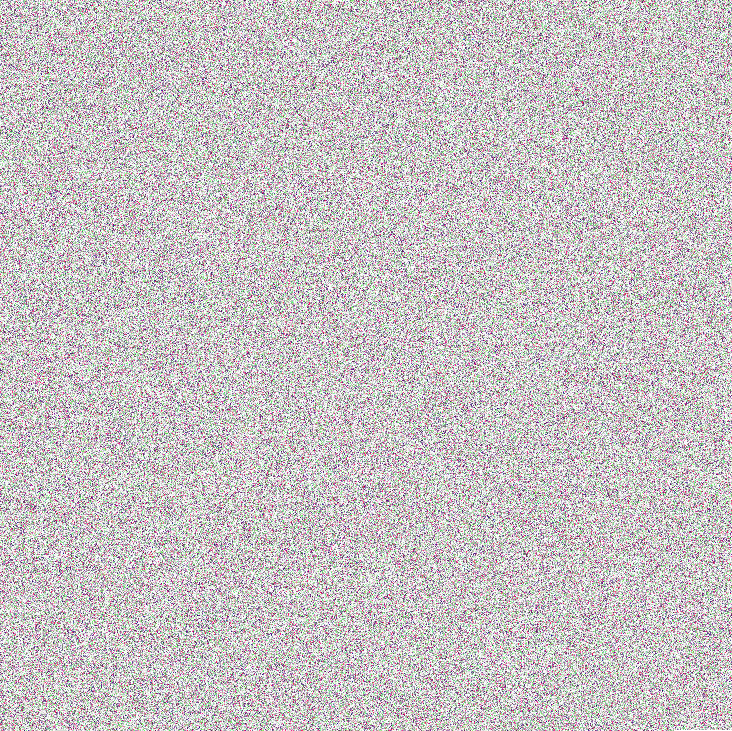

In [1]:
import sys
import os

# 确定项目根目录（假设当前工作目录是项目的根目录）
project_root = os.path.abspath("..")
sys.path.insert(0, project_root)

from instances.inst_imgEncoder import ImgEncoder

ie = ImgEncoder()
img_rgba = ie.encode_text(r"Q:\Project\test\text_re\test.txt", "rgba")

img_rgba

Encoding text(grey):: 100%|██████████| 1070068/1070068 [00:02<00:00, 371182.45it/s]


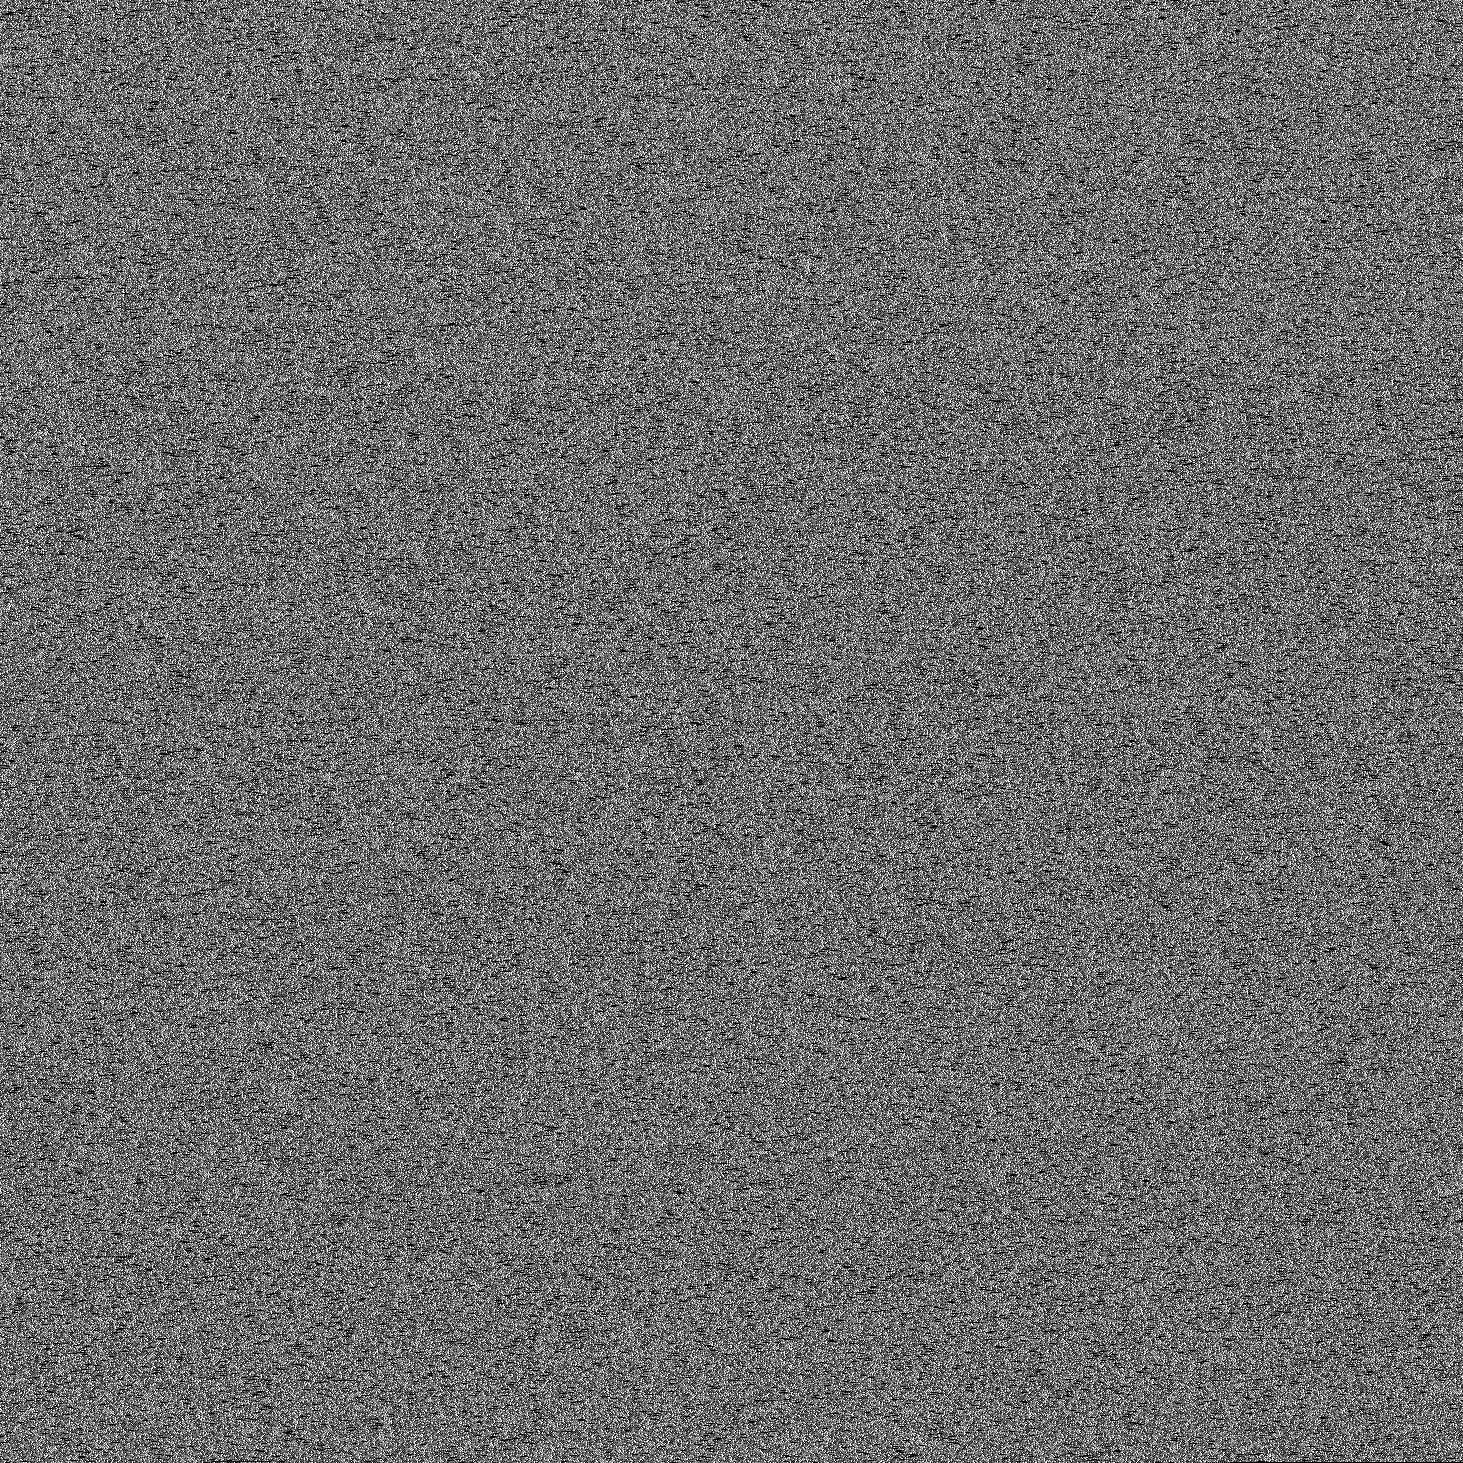

In [2]:
img_grey = ie.encode_text(r"Q:\Project\test\text_re\test.txt", "grey")

img_grey